# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# adjusted the dataset for regression analysis

chip = pd.read_csv("chip.csv")
chip = chip.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
chip['Release Date'] = pd.to_datetime(chip['Release Date'])
chip['year'], chip['month'] = chip['Release Date'].dt.year, chip['Release Date'].dt.month
chip = chip.dropna()
chip.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,year,month
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,2007.0,2.0
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,2018.0,9.0
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,2013.0,9.0
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,2011.0,5.0
5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel,Intel,2013.0,9.0


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

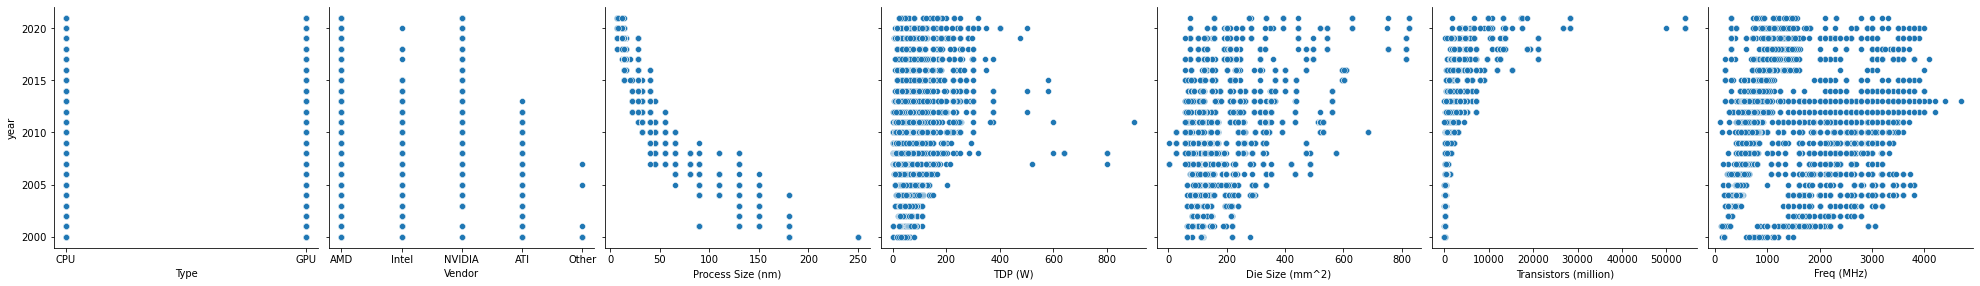

In [11]:
sns.pairplot(chip, x_vars=['Type','Vendor','Process Size (nm)','TDP (W)','Die Size (mm^2)','Transistors (million)','Freq (MHz)'],
            y_vars='year', height=4, aspect=1, kind='scatter')
plt.show()

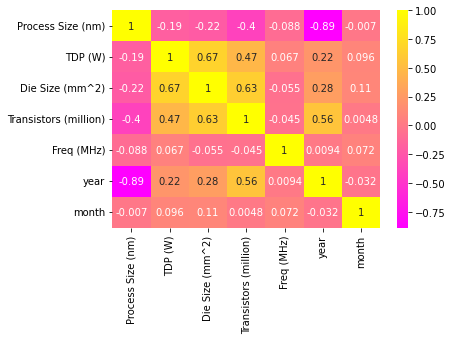

In [12]:
sns.heatmap(chip.corr(), cmap='spring', annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [13]:
# creating x and y

X = chip['Process Size (nm)']
y = chip['year']

In [14]:
# splitting data for train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

In [15]:
import statsmodels.api as sm

#add constant

X_train_sm = sm.add_constant(X_train)

# OLS regression line

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const                2016.454287
Process Size (nm)      -0.110203
dtype: float64

In [16]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     8865.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:25:50   Log-Likelihood:                -5276.6
No. Observations:                2356   AIC:                         1.056e+04
Df Residuals:                    2354   BIC:                         1.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2016.4543      0.077   2.62e+04      0.000    2016.304    2016.605
Process Size (nm)    -0.1102      0.001    -94.154      0.000      -0.112      -0.108
==============================================================================
Omnibus:                      184.730   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.215
Skew:                           0.740   Prob(JB):                     2.78e-50
Kurtosis:                       3.367   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

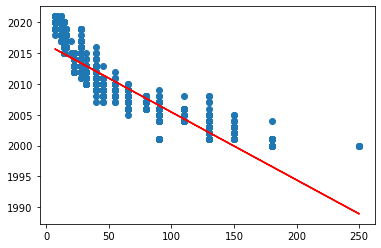

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2016.4543 + -0.1102*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [18]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\ashle\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


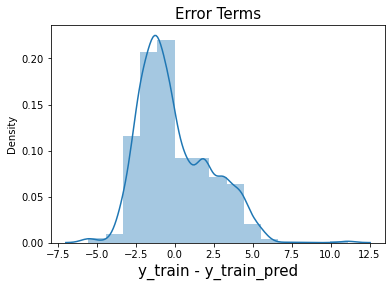

In [19]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

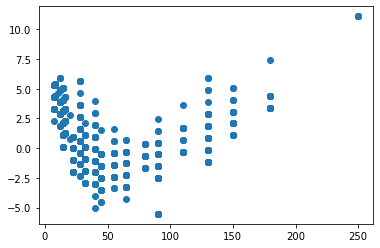

In [20]:
plt.scatter(X_train, res)
plt.show()

### Summarize Your Work

## Make notes of your answers to the questions below.

### 1. What was your R-squared value?

#### 0.790

### 2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?

#### A linear regression model was able to verify a prediction of the data, so I believe it was okay to use here.

### 3. Was your plot of the error terms a bell curve?

#### There is a slight curve.